<a href="https://colab.research.google.com/github/simplyAakash/Prediction-using-Unsupervised-ML/blob/main/Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd                                           # for reading the dataset
from sklearn.model_selection import train_test_split          # to split the dataset into training and test set 
from sklearn.linear_model import LinearRegression             # Linear Regression Model
import matplotlib.pyplot as plt                               # to plot the dataset and regression line
from sklearn.datasets import load_iris                        # to load in-built iris dataset

In [2]:
iris_dataset = load_iris()
print('Dataset imported successfully')

Dataset imported successfully


In [3]:
dataframe = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
dataframe.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
111,6.4,2.7,5.3,1.9
6,4.6,3.4,1.4,0.3
19,5.1,3.8,1.5,0.3
66,5.6,3.0,4.5,1.5
109,7.2,3.6,6.1,2.5
8,4.4,2.9,1.4,0.2
2,4.7,3.2,1.3,0.2
137,6.4,3.1,5.5,1.8
32,5.2,4.1,1.5,0.1
10,5.4,3.7,1.5,0.2


In [4]:
x = dataframe.iloc[:, :].values
x.shape

(150, 4)

Using the elbow method to find the optimal number of clusters

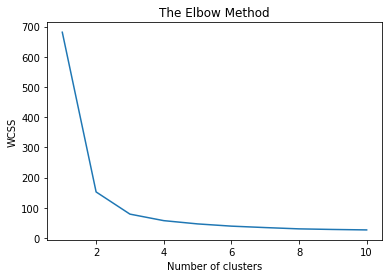

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, max_iter = 300, n_init = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Training the Model

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print('Training completed')

Training completed


Visualising the Clusters

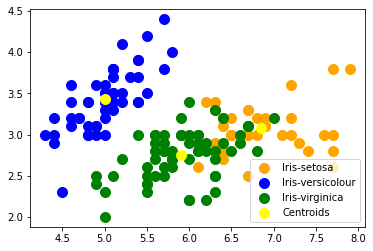

In [10]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()